In [11]:
#https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/
#https://www.aviso.altimetry.fr/
#https://github.com/VHeimhuber/InletTracker
import netCDF4
import numpy as np
import pyfes
import datetime
import matplotlib.pyplot as plt
f = netCDF4.Dataset('D:/Github/aviso-fes/data/fes2014/eastward_velocity/m2.nc')
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    cdm_data_type: Grid
    license: http://www.aviso.oceanobs.com/fileadmin/documents/data/License_Aviso.pdf
    title: FES2014a tide currents
    product_version: a
    summary: global tide solution using finite element mesh, T-UGO barotropic model and data assimilation of altimetry and tidal gauges
    project: FES2014
    credits: LEGOS, NOVELTIS, CLS, CNES
    contact: aviso@oceanobs.com
    references: http://www.aviso.altimetry.fr/en/data/products/auxiliary-products/global-tide-fes/description-fes2014.html
    date_created: 2016-10-20 13:44:41
    history: 2016-10-20 13:44:41:creation
    Conventions: CF-1.6
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    geospatial_lat_resolution: 0.0625
    geospatial_lon_resolution: 0.0625
    dimensions(sizes): lat(2881), lon(5760), nv(2)
    variables(dimensions): float32 lat(lat), float32 lat_bnds(lat, nv), float32 lon(l

In [12]:
#returns 24 hour tidal cycle
def tgauge(tide_moment,tide_lat,tide_lon):
    # Create handler
    short_tide = pyfes.Handler("ocean", "io", "D:/Github/aviso-fes/data/fes2014/ocean_tide.ini")
    radial_tide = pyfes.Handler("radial", "io", "D:/Github/aviso-fes/data/fes2014/load_tide.ini")

    # Creating the time series
    dates = np.array([
        tide_moment + datetime.timedelta(seconds=item * 3600)
        for item in range(96)
    ])

    lats = np.full(dates.shape, tide_lat)
    lons = np.full(dates.shape, tide_lon)

    # Computes tides
    tide, lp, _ = short_tide.calculate(lons, lats, dates)
    load, load_lp, _ = radial_tide.calculate(lons, lats, dates)
    
    total_tide = [];dt = []
    for idx, date in enumerate(dates):
        total_tide.append(tide[idx] + lp[idx] + load[idx])
        dt.append(date)
        # print("%s %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f" %
        #       (date, lats[idx], lons[idx], tide[idx], lp[idx], tide[idx] +
        #        lp[idx], tide[idx] + lp[idx] + load[idx], load[idx]))
    return dt,total_tide

<function matplotlib.pyplot.show(close=None, block=None)>

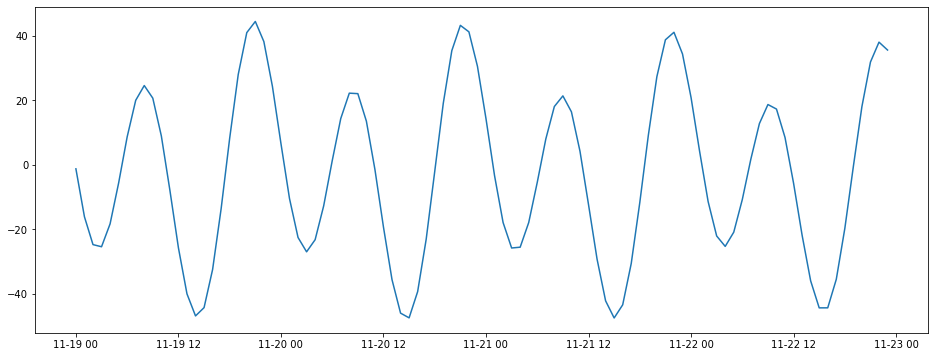

In [16]:
#determine correct cell for maldives data
# Latitude and longitude coordinates for Male are: 1.924992, 73.399658
lat=1.924992;lon=73.399658
moment = datetime.datetime(2021, 11, 19)
dt,th = tgauge(moment,lat,lon)
plt.subplots(figsize=(16, 6))

plt.plot(dt,th)
plt.show

In [17]:
# def tide_velocity(tide_moment,tide_lat,tide_lon):
#     # Create handler
#     eastward_velocity = pyfes.Handler("ocean", "memory", "C:/Users/walte/Documents/Github/aviso-fes/data/fes2014/eastward_velocity.ini")
#     northward_velocity = pyfes.Handler("ocean", "memory", "C:/Users/walte/Documents/Github/aviso-fes/data/fes2014/northward_velocity.ini")

#     # Creating a grid that will be used to interpolate the tide
#     lats = np.arange(-5, 15, 1.0)
#     lons = np.arange(65, 85, 1.0)

#     assert lons.shape == lats.shape
#     size = lats.size

#     lons, lats = np.meshgrid(lons, lats)

#     dates = np.empty(lons.shape, dtype='datetime64[us]')
#     dates.fill(tide_moment)

#     # Create handler
#     u_tide, lp, _ = eastward_velocity.calculate(lons.ravel(), lats.ravel(),
#                                                 dates.ravel())
#     v_tide, _, _ = northward_velocity.calculate(lons.ravel(), lats.ravel(),
#                                                 dates.ravel())

#     # Creating an image to see the result in meters
#     u_tide = u_tide.reshape((size, size))
#     u_tide = np.ma.masked_where(np.isnan(u_tide), u_tide)
#     plt.figure(1)
#     plt.title("eastward velocity")
#     plt.pcolormesh(u_tide)

#     v_tide = v_tide.reshape((size, size))
#     v_tide = np.ma.masked_where(np.isnan(v_tide), v_tide)
#     plt.figure(2)
#     plt.title("northward velocity")
#     plt.pcolormesh(v_tide)

#     plt.show()

In [18]:
def tide_velocity_time(tide_moment,tide_lat,tide_lon):
    # Create handler
    eastward_velocity = pyfes.Handler("ocean", "memory", "D:/Github/aviso-fes/data/fes2014/eastward_velocity.ini")
    northward_velocity = pyfes.Handler("ocean", "memory", "D:/Github/aviso-fes/data/fes2014/northward_velocity.ini")

    # Creating the time series
    dates = np.array([
        tide_moment + datetime.timedelta(seconds=item * 3600)
        for item in range(96)
    ])
    lats = np.full(dates.shape, tide_lat)
    lons = np.full(dates.shape, tide_lon)

    # Create handler
    u_tide, lp, _ = eastward_velocity.calculate(lons.ravel(), lats.ravel(),
                                                dates.ravel())
    v_tide, _, _ = northward_velocity.calculate(lons.ravel(), lats.ravel(),
                                                dates.ravel())

    # Creating an image to see the result in meters
    u_tide = np.ma.masked_where(np.isnan(u_tide), u_tide)
    v_tide = np.ma.masked_where(np.isnan(v_tide), v_tide)

    return u_tide,v_tide, dates



In [19]:
#determine correct cell for maldives data
# Latitude and longitude coordinates for Male are: 1.924992, 73.399658
lat=1.924992;lon=73.399658
moment = datetime.datetime(2021, 11, 19)
u,v, d = tide_velocity_time(moment,lat,lon)
data_out = np.array([u,v])

#export array to CSV file
np.savetxt("tide_velocity.csv", data_out, delimiter=",")